# 1.0 Gathering:
## 1.1 requirements:
    1- Download this file manually by clicking the following link: twitter_archive_enhanced.csv.
    2- Download the file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

    3- Then read tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [1]:
#Enbles me to dowload and save the file on my set.
import requests
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

import json


## 1.2 Downloading the twitter_archive_enhanced.csv manually:
By clicking the following link: twitter_archive_enhanced.csv.

In [2]:
#1- Read the downloaded manual file using reac_csv()
twitter_archive_df = pd.read_csv('twitter_archive_enhanced.csv')

## 1.3 Downloading the image_predictions.tsv:
Using programatic way from url.


In [3]:
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [4]:
image_predictions_df = pd.read_csv('image_predictions.tsv', sep ='\t')

## 1.4 Reading tweet_json.txt file:
line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

In [5]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


'\nimport tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.

In [6]:
tweet_json_ldic = []    
with open('tweet_json.txt') as json_file:
    lines = json_file.readlines()
    
for line in lines:
    data = json.loads(line)
    tweet_json_ldic.append({'tweet_ID': data['id'],'retweet_count' : data['retweet_count'], 
                            'favorite_count': data['favorite_count'] })
  
tweet_json_df = pd.DataFrame(tweet_json_ldic,columns = {'tweet_ID', 'retweet_count', 'favorite_count'})
    

# 2.0 Assesment:

## 2.1.0 twitter_archive_df Assesment Process: 


### 2.1.1 Visual Assesment

 Note: Here we will assest each table visually and then programatic, then I will write the assesment notes after each table.

In [7]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
twitter_archive_df.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1763,678446151570427904,NaN,NaN,2015-12-20 05:25:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Touching scene here. Really stirs up the emoti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678446151...,10,10,None,None,None,None,None
306,836001077879255040,NaN,NaN,2017-02-26 23:52:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas is back and this time he's prettier than...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836001077...,13,10,None,None,None,None,None
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,None,floofer,None,None
1525,690400367696297985,NaN,NaN,2016-01-22 05:07:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eriq. His friend just reminded him of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690400367...,10,10,Eriq,None,None,None,None
1072,739979191639244800,NaN,NaN,2016-06-07 00:36:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nollie. She's waving at you. If you do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739979191...,12,10,Nollie,None,None,None,None
2098,670727704916926465,NaN,NaN,2015-11-28 22:15:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrie. He's a handheld pup. Excellen...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670727704...,10,10,Jeffrie,None,None,None,None
1559,688547210804498433,NaN,NaN,2016-01-17 02:23:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frönq. He got caught stealing a waffle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688547210...,9,10,Frönq,None,None,None,None
1234,712717840512598017,NaN,NaN,2016-03-23 19:09:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please don't send in any more polar bears. We ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712717840...,10,10,None,None,None,None,None
2208,668625577880875008,NaN,NaN,2015-11-23 03:02:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maks. Maks just noticed something wasn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668625577...,10,10,Maks,None,None,None,None
1986,672884426393653248,NaN,NaN,2015-12-04 21:05:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Marvelous dog here. Rad ears. Not very soft. L...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672884426...,6,10,None,None,None,None,None


## 2.1.2 Programatic Assesment:

In [9]:
# To know information about, columns number, missing values in each column, columns' header names, columns' data types.
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# To check the duplicates in the table
twitter_archive_df.duplicated().sum()

0

In [11]:
# To check values in the numerator column.
twitter_archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [12]:
# To check the denominator values
twitter_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [13]:
#To get the number of retweet.
(twitter_archive_df.retweeted_status_id.isnull()== False).sum()

181

In [14]:
# To get the names of the names of dog
dog_name = twitter_archive_df.name.value_counts()
dog_name

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
          ... 
Tess         1
Jazz         1
Jangle       1
Cedrick      1
Eugene       1
Name: name, Length: 957, dtype: int64

In [15]:
# To get the values in the source column:
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
twitter_archive_df.expanded_urls.isnull().sum()

59

## 2.1.3 twitter_archive_df Assesment Notes:
### Quality:
  -  Incorrect data type in the tweet_id column.
  -  Retweet columns are retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp, retweeted_status_user_id.
  -  Missmatch between the tweets ids of image_predictions_df and twitterDf_copy.
  -  Including HTML url formates in the source column.
  -  Incorrect values in rating_denominator and rating_numerator: denominator has some values less than 10 such as 0 and very large such as 170. The numerator has some large values such as 1776  and very small values such as 0.
  -  Droping the reply useless columns which are : in_reply_to_user_id, in_reply_to_status_id
  -  Missing values in the in_reply_to_status_id, in_reply_to_user_id columns.
  -  Incorrect data type in the timestamp Column.
  -  Incorrect and None values in the column name such as a.


### Tidiness:
  -  doggo, floofer, pupper and puppo are stages for the dog, so they can be represented in one column.
  -  Extract the date from the timestamp column and the drop the timestamp column.

## 2.2.0 image_predictions_df Assesment Process:

### 2.2.1 Visiuall Assesment:

In [17]:
image_predictions_df.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
image_predictions_df.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [19]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
761,688894073864884227,https://pbs.twimg.com/media/CY9xf1dUAAE4XLc.jpg,1,hog,0.669996,False,guinea_pig,0.077347,False,hamster,0.062398,False
1814,833722901757046785,https://pbs.twimg.com/media/C5H6jmgW8AAevqq.jpg,1,West_Highland_white_terrier,0.918144,True,Maltese_dog,0.025721,True,Lakeland_terrier,0.020211,True
511,676191832485810177,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,2,Chihuahua,0.376741,True,Italian_greyhound,0.173114,True,muzzle,0.071485,False
196,669597912108789760,https://pbs.twimg.com/media/CUrjvxiVEAA94dH.jpg,1,Eskimo_dog,0.595665,True,Siberian_husky,0.214474,True,white_wolf,0.147235,False
705,684940049151070208,https://pbs.twimg.com/media/CYFlVUFWwAAEsWX.jpg,2,Border_collie,0.665578,True,collie,0.176846,True,Old_English_sheepdog,0.065175,True
227,670374371102445568,https://pbs.twimg.com/media/CU2l7yvXAAUyYIJ.jpg,1,English_springer,0.974936,True,English_setter,0.011661,True,cocker_spaniel,0.002689,True
1419,771500966810099713,https://pbs.twimg.com/media/CrTsCPHWYAANdzC.jpg,1,Labrador_retriever,0.833952,True,golden_retriever,0.103223,True,soccer_ball,0.012094,False
588,679111216690831360,https://pbs.twimg.com/ext_tw_video_thumb/67911...,1,kelpie,0.189423,True,beagle,0.121988,True,basset,0.121171,True
1605,800443802682937345,https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg,1,mousetrap,0.777468,False,black_widow,0.093940,False,paddlewheel,0.017492,False
178,669216679721873412,https://pbs.twimg.com/media/CUmJBS5WUAAKtrP.jpg,1,golden_retriever,0.992758,True,Irish_setter,0.003379,True,Saluki,0.001230,True


### 2.2.2 Programatic Assesment :

In [20]:
# To know information about, columns number, missing values in each column, columns' header names, columns' data types.
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
#To check duplicates
image_predictions_df.duplicated().sum()

0

In [22]:
# To check dulicates in a specific column
image_predictions_df.tweet_id.duplicated().sum()

0

## 2.2.3 image_predictions_df Assesment Notes:
### Qualitiness:
  -  Incorrect data type in the tweet_id column.
  -  Inexpressive header names of p1, p2, p3, pf p1_conf, p2_conf, p3_conf.


## 2.3.0 tweet_json_df Assesment process:

### 2.3.1 Visiual Assesment:

In [23]:
tweet_json_df

,retweet_count,favorite_count,tweet_ID
0,8853,39467,892420643555336193
1,6514,33819,892177421306343426
2,4328,25461,891815181378084864
3,8964,42908,891689557279858688
4,9774,41048,891327558926688256
...,...,...,...
2349,41,111,666049248165822465
2350,147,311,666044226329800704
2351,47,128,666033412701032449
2352,48,132,666029285002620928


### 2.3.2 Programatic Assesment:

In [24]:
# To know information about, columns number, missing values in each column, columns' header names, columns' data types.
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   retweet_count   2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   tweet_ID        2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
# To check the duplicated in the table generally.
tweet_json_df.duplicated().sum()

0

In [26]:
# To check the values of favorite_count
tweet_json_df['favorite_count'].value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [27]:
# To check the values of retweet_count
tweet_json_df['retweet_count'].value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

## 2.3.3 tweet_json_df Assesment Notes:
### Quality:
   -  Incorrect data tye in the tweet_id columns. It should be string not integer since there is no required calculation on this column.
   
### Tidiness:
   -  Merging the retweet_count, favorite_count to the twitter_archive_df since this information is related to the tweet itself.

# 3.0 Cleaning

## 3.1 twitter_archive_df:

###  3.1.1 Qualitiness:

In [28]:
twitterDf_copy = twitter_archive_df.copy()

#### 3.1.1.1 Incorrect data type in the tweet_id column

#####  3.1.1.1.1 Define
  -  Correct the data type in the tweet_id column into string suging astype().

#####  3.1.1.1.2 Code

In [29]:
twitterDf_copy.tweet_id = twitter_archive_df['tweet_id'].astype(str)

####  3.1.1.1.3 Test

In [30]:
twitterDf_copy['tweet_id'].dtypes

dtype('O')

#### 3.1.1.2 Retweet columns are retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp.

##### 3.1.1.2.1 Define:
   -  Drop all retweet columns:  retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp using pd.drop()

##### 3.1.1.2.2 Code:

In [31]:
twitterDf_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [32]:
twitterDf_copy[twitterDf_copy['retweeted_status_timestamp'].isnull() == False]




,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [33]:
twitterDf_copy = twitterDf_copy.drop(index = twitterDf_copy.index[twitterDf_copy['retweeted_status_timestamp'].isnull() == False].tolist())

In [34]:
twitterDf_copy = twitterDf_copy.drop(['retweeted_status_user_id', 'retweeted_status_id', 'retweeted_status_timestamp'], axis=1)

##### 3.1.1.2.3 Test:

In [35]:
# To check the coumns retweeted_status_user_id, retweeted_status_id, retweeted_status_timestamp
twitterDf_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   object 
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 254.9+

#### 3.1.1.3 Missmatch between the tweets ids of image_predictions_df and twitterDf_copy.

##### 3.1.1.3.1 Define:

  -  Drop the Missmatch between the tweets ids of image_predictions_df and twitterDf_copy. 

##### 3.1.1.3.2 Code:

In [36]:
twitterDf_copy = twitterDf_copy[twitterDf_copy.tweet_id.isin(image_predictions_df.tweet_id.astype(str))]

#### 3.1.3.2 Test:

In [37]:
twitterDf_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  doggo                  1994 non-null   object 
 11  floofer                1994 non-null   object 
 12  pupper                 1994 non-null   object 
 13  puppo                  1994 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 233.7+

#### 3.1.1.4 Including HTML url formates in the source column.

##### 3.1.1.4.1 Define:

Cut the source from the url in the source column string.

##### 3.1.1.4.2 Code:

In [38]:
# Check the vaules in the source column after droping some rows.
twitterDf_copy.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [39]:
source_values = ['Twitter for iPhone',
              'Twitter Web Client',
             'TweetDeck']

for index, tweet in twitterDf_copy.iterrows():
    if tweet['source'].find('Twitter for iPhone') == 60 :
        twitterDf_copy.loc[index,'source'] = 'Twitter for iPhone'
    elif tweet['source'].find('Twitter Web Client') == 44:
        twitterDf_copy.loc[index,'source'] = 'Twitter Web Client'
    else:
        twitterDf_copy.loc[index,'source'] = 'TweetDeck'    

##### 3.1.1.4.3 Test:

In [40]:
twitterDf_copy['source'].value_counts()

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### 3.1.1.5 Incorrect values in rating_denominator

##### 3.1.1.5.1 Define

It has some values less than 10 such as 0 and very large such as 170. To solve this problem, it is required many steps:
-  Extract the available correct values from tweet text.
-  Denominator unification for others which the Nominator is greater than denominator. So, the doniminator for all should be 10.

#####  3.1.1.5.2 Code:

In [41]:
#check before filling for the nomerator
len(twitterDf_copy[twitterDf_copy['rating_numerator']< 10]) + len(twitterDf_copy[twitterDf_copy['rating_numerator']> 20])

433

In [42]:
len(twitterDf_copy[twitterDf_copy['rating_denominator'] != 10])

18

In [43]:
Unapplicable_nomerator = [5,3,4,2,1,0,80,24,26,44,50,60,165,84,88,144,143,420,1776,27,45,75,99,121,204]

for index, tweet in twitterDf_copy.iterrows():
    if tweet['rating_numerator'] in (Unapplicable_nomerator):
        twitterDf_copy.loc[index,'rating_numerator'] = int(twitterDf_copy['rating_numerator'].median())
    
    if tweet['rating_denominator'] != 10:
        twitterDf_copy.loc[index,'rating_denominator'] = int(twitterDf_copy['rating_denominator'].median())
     
        


#####  3.1.1.5.3 Test

In [44]:
twitterDf_copy['rating_denominator'].value_counts()

10    1994
Name: rating_denominator, dtype: int64

In [45]:
twitterDf_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   object 
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  doggo                  1994 non-null   object 
 11  floofer                1994 non-null   object 
 12  pupper                 1994 non-null   object 
 13  puppo                  1994 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 313.7+

In [46]:
len(twitterDf_copy[twitterDf_copy['rating_denominator'] != 10])

0

In [47]:
twitterDf_copy['rating_numerator'].value_counts()


11    499
12    450
10    419
13    261
9     151
8      95
7      52
14     35
6      32
Name: rating_numerator, dtype: int64

#### 3.1.1.6 Droping the reply useless columns:
##### 3.1.1.6.1 Define:

-  Drop the reply useless columns which are : in_reply_to_user_id, in_reply_to_status_id.
-  Also, the two columns has many missing values. they has only 23 value from 2075. We can use them in our analysis.

##### 3.1.1.6.2 Code:

In [48]:
twitterDf_copy = twitterDf_copy.drop(['in_reply_to_user_id','in_reply_to_status_id'], axis=1)

##### 3.1.1.6.3 Test:

In [49]:
twitterDf_copy.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [50]:
twitterDf_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1994 non-null   object
 1   timestamp           1994 non-null   object
 2   source              1994 non-null   object
 3   text                1994 non-null   object
 4   expanded_urls       1994 non-null   object
 5   rating_numerator    1994 non-null   int64 
 6   rating_denominator  1994 non-null   int64 
 7   name                1994 non-null   object
 8   doggo               1994 non-null   object
 9   floofer             1994 non-null   object
 10  pupper              1994 non-null   object
 11  puppo               1994 non-null   object
dtypes: int64(2), object(10)
memory usage: 282.5+ KB


#### 3.1.1.7 Incorrect data type in the timestamp Column:
##### 3.1.1.7.1 Define:
   -  convert the timestamp from string into datetime data type.

##### 3.1.1.7.2 Code:

In [51]:
twitterDf_copy['timestamp'] = pd.to_datetime(twitterDf_copy['timestamp'])

##### 3.1.1.7.3 Test

In [52]:
twitterDf_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   doggo               1994 non-null   object             
 9   floofer             1994 non-null   object             
 10  pupper              1994 non-null   object             
 11  puppo               1994 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

#### 3.1.1.8 Incorrect values in the name column

##### 3.1.1.8.1 Define:

-  convert the incorrect into None values in the column name such as a, all,....

##### 3.1.1.8.2 Code:

In [53]:
twitterDf_copy.name.value_counts()

None       546
a           55
Charlie     11
Oliver      10
Cooper      10
          ... 
Traviss      1
Major        1
Tilly        1
Saydee       1
Eugene       1
Name: name, Length: 936, dtype: int64

In [54]:
twitterDf_copy['name']= twitterDf_copy['name'].str.strip()
twitterDf_copy['name'].head(2)

0    Phineas
1      Tilly
Name: name, dtype: object

In [55]:
twitterDf_copy['name'].str.istitle().sum()
Lowercase = twitterDf_copy[twitterDf_copy['name'].str.istitle() == False]

In [56]:
lowercase_names = Lowercase.name.unique()

-  Here I remove the missspling names to be corrected manually.

In [57]:
type(lowercase_names)
lowercase_names
Lower_names_mistake = np.array(['BeBe', 'DonDon', 'CeCe', 'JD', 'DayZ'],dtype=object)
lowercase_names = np.setdiff1d(lowercase_names,Lower_names_mistake)
lowercase_names

array(['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly',
       'infuriating', 'just', 'light', 'my', 'not', 'officially', 'one',
       'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'],
      dtype=object)

In the above all the names which can't be a real name or a correct spelling names. so, some of them will be corrected by putting the value None, but others will be corrected programatically to be a right title.

In [58]:
# Here to enter None in Mistaken names
for i in  range( len(lowercase_names)):
    twitterDf_copy.replace(lowercase_names[i],'None',inplace=True)

In [59]:
#Here to make the other Lower_names_mistake to be right titeled.
twitterDf_copy.replace(Lower_names_mistake[0],'Bebe', inplace=True)
twitterDf_copy.replace(Lower_names_mistake[1],'Donon', inplace=True)
twitterDf_copy.replace(Lower_names_mistake[2],'Cece', inplace=True)
twitterDf_copy.replace(Lower_names_mistake[3],'None', inplace=True)
twitterDf_copy.replace(Lower_names_mistake[4],'Dayz', inplace=True)

##### 3.1.1.8.3 Test:

In [60]:
twitterDf_copy[twitterDf_copy['name'].str.istitle() == False]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [61]:
twitterDf_copy[twitterDf_copy.name =='DonDon']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### 3.1.2 Tidiness:

#### 3.1.2.1 doggo, floofer, pupper and puppo are stages for the dog

##### 3.1.2.1.1 Define:

-  Combine all columns in one column called dog_stage.

##### 3.1.2.1.2 Code:

In [62]:
twitterDf_copy['floofer'].value_counts()

None       1986
floofer       8
Name: floofer, dtype: int64

In [63]:
#Create a new column called the dog_stage.
stage_list = []
dog_stage_list = []
stage_list =['doggo','floofer', 'pupper', 'puppo']

for index, tweet in twitterDf_copy.iterrows():
    s = ''
    if tweet['doggo'] in stage_list:
        s += 'doggo'
        s += '-'
    if (tweet['floofer'] in stage_list):
        s += 'floofer'
        s += '-'
    if (tweet['pupper'] in stage_list):   
        s += 'pupper'
        s += '-'
    if (tweet['puppo'] in stage_list):   
        s += 'puppo'
        s += '-'
    if s.endswith('-'):
        s = s[:-1]
    if not s:
        s = 'None' 
    dog_stage_list.append(s)  
twitterDf_copy.insert(8,'dog_stage',dog_stage_list)  
    
        

In [64]:
#drop the the four columns
twitterDf_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)

##### 3.1.2.1.3 Test:

In [65]:
twitterDf_copy['dog_stage'].value_counts()

None             1688
pupper            203
doggo              63
puppo              22
doggo-pupper        9
floofer             7
doggo-floofer       1
doggo-puppo         1
Name: dog_stage, dtype: int64

In [66]:
#To check the columns' names
twitterDf_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   text                1994 non-null   object             
 4   expanded_urls       1994 non-null   object             
 5   rating_numerator    1994 non-null   int64              
 6   rating_denominator  1994 non-null   int64              
 7   name                1994 non-null   object             
 8   dog_stage           1994 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 235.8+ KB


#### 3.1.2.2 Extract the date from the timestamp column .
##### 3.1.2.2.1 Define:
 -  Separate the timestamp into date to be easier in analysis.

##### 3.1.2.2.1 Code:

In [67]:
twitterDf_copy.timestamp.head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [68]:
twitterDf_copy['date'] = [d.date() for d in twitterDf_copy['timestamp']]

In [69]:
twitterDf_copy['date'] = pd.to_datetime(twitterDf_copy['date'], format= '%Y-%m-%d')

In [70]:
twitterDf_copy.drop(['timestamp'], axis=1, inplace = True)

##### 3.1.2.2.1 Test:

In [71]:
twitterDf_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   source              1994 non-null   object        
 2   text                1994 non-null   object        
 3   expanded_urls       1994 non-null   object        
 4   rating_numerator    1994 non-null   int64         
 5   rating_denominator  1994 non-null   int64         
 6   name                1994 non-null   object        
 7   dog_stage           1994 non-null   object        
 8   date                1994 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 235.8+ KB


In [72]:
twitterDf_copy.head(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,date
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,2017-08-01
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,2017-08-01
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,2017-07-31
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,2017-07-30
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,2017-07-29


## 3.2.0 image_predictions_df 

### 3.2.1 Qualitiness

#### 3.2.1.1 Incorrect data type in the tweet_id column

##### 3.2.1.1.1 Define:

 -  Correct the data type in the tweet_id column to be string

##### 3.2.1.1.2 Code:

In [73]:
image_predic_dfcopy = image_predictions_df.copy()
image_predic_dfcopy.tweet_id = image_predic_dfcopy['tweet_id'].astype(str)

##### 3.2.1.1.3 Test:

In [74]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [75]:
image_predic_dfcopy.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### 3.2.1.2 Inexpressive header names of p1, p2, p3,  p1_con, p2_conf, p3_conf:

##### 3.2.1.2.1 Define:
 -  Correct the header names of p1,p2,p3 into prediction_1, prediction_2, prediction1_3
 - Inexpressive header names pf p1_conf, p2_conf, p3_conf into p1_confidence, p2_confidence, p3_confidence.


##### 3.2.1.2.1 Code:

In [76]:
image_predic_dfcopy.rename(columns={'p1':'prediction_1', 'p2':'prediction_2', 
                                     'p3':'prediction_3', 'p1_conf':'p1_confidence', 'p2_conf':'p2_confidence',
                                     'p3_conf':'p3_confidence'}, inplace=True)


##### 3.2.1.2.1 Test:

In [77]:
image_predic_dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       2075 non-null   object 
 1   jpg_url        2075 non-null   object 
 2   img_num        2075 non-null   int64  
 3   prediction_1   2075 non-null   object 
 4   p1_confidence  2075 non-null   float64
 5   p1_dog         2075 non-null   bool   
 6   prediction_2   2075 non-null   object 
 7   p2_confidence  2075 non-null   float64
 8   p2_dog         2075 non-null   bool   
 9   prediction_3   2075 non-null   object 
 10  p3_confidence  2075 non-null   float64
 11  p3_dog         2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## 3.3.0 tweet_json_df

### 3.3.1 Qualitiness

#### 3.3.1.1 Incorrect data tye in the tweet_id columns. 

##### 3.3.1.1.1 Define:
-  convert the integer into string.

#####  3.3.1.1.2 Code:

In [78]:
tweet_json_dfcopy = tweet_json_df.copy()


In [79]:
tweet_json_dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   retweet_count   2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   tweet_ID        2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [80]:
tweet_json_dfcopy.tweet_ID = tweet_json_dfcopy['tweet_ID'].astype(str)

#####  3.3.1.1.3 Test:

In [81]:
tweet_json_dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   retweet_count   2354 non-null   int64 
 1   favorite_count  2354 non-null   int64 
 2   tweet_ID        2354 non-null   object
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


###  3.3.2 Tidiness

#### 3.3.2.1 Merging the retweet_count. favorite_count to the twitter_archive_df.

##### 3.3.2.1.1 Define:
-  Merge the retweet_count, favorite_count to the twitter_archive_df since this information is related to the tweet itself.

##### 3.3.2.1.2 Code:

In [82]:
tweet_json_dfcopy.rename(columns={'tweet_ID':'tweet_id'}, inplace=True)

In [83]:
tweet_json_dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   retweet_count   2354 non-null   int64 
 1   favorite_count  2354 non-null   int64 
 2   tweet_id        2354 non-null   object
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [84]:
twitter_master = pd.merge(twitterDf_copy,tweet_json_dfcopy, on='tweet_id', how='outer')

In [93]:
twitter_master.iloc[1994:]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,date,retweet_count,favorite_count
1994,886267009285017600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,4,117
1995,886054160059072513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,108,0
1996,885518971528720385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,3899,20788
1997,885311592912609280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,19297,0
1998,884247878851493888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,21298,74423
...,...,...,...,...,...,...,...,...,...,...,...
2349,668967877119254528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,25,161
2350,668587383441514497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,1174,1760
2351,667550904950915073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,37,0
2352,667550882905632768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,34,0


In [94]:

twitter_master = twitter_master.drop(index = [i for i in range(1994, 2354)])
#twitter_master.dropna(axis=0)

In [95]:
twitter_master['retweet_count'].isnull().sum()
twitter_master['retweet_count'].describe()


count     1994.000000
mean      2766.753260
std       4674.698447
min         16.000000
25%        624.750000
50%       1359.500000
75%       3220.000000
max      79515.000000
Name: retweet_count, dtype: float64

In [97]:
twitter_master['retweet_count'].fillna(2976, inplace=True)

In [98]:
twitter_master['retweet_count'].isnull().sum()


0

In [99]:
twitter_master['retweet_count'] = twitter_master['retweet_count'].astype(int)

In [100]:
twitter_master['favorite_count'].describe()


count      1994.000000
mean       8895.725677
std       12213.193181
min          81.000000
25%        1982.000000
50%        4136.000000
75%       11308.000000
max      132810.000000
Name: favorite_count, dtype: float64

In [101]:
twitter_master['favorite_count'].fillna(8556, inplace=True)

In [102]:
twitter_master['favorite_count'] = twitter_master['favorite_count'].astype(int)

##### 3.3.2.1.2 Test:

In [103]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   source              1994 non-null   object        
 2   text                1994 non-null   object        
 3   expanded_urls       1994 non-null   object        
 4   rating_numerator    1994 non-null   float64       
 5   rating_denominator  1994 non-null   float64       
 6   name                1994 non-null   object        
 7   dog_stage           1994 non-null   object        
 8   date                1994 non-null   datetime64[ns]
 9   retweet_count       1994 non-null   int32         
 10  favorite_count      1994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(6)
memory usage: 171.4+ KB


In [104]:
twitter_master.head(2)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,date,retweet_count,favorite_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,2017-08-01,8853,39467
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,2017-08-01,6514,33819


# 4. Storing:

In [149]:
twitter_master.to_csv('twitter_archive_master.csv', index=False)


# 5. Analyzing:

In [106]:
df = twitter_master.copy()

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   source              1994 non-null   object        
 2   text                1994 non-null   object        
 3   expanded_urls       1994 non-null   object        
 4   rating_numerator    1994 non-null   float64       
 5   rating_denominator  1994 non-null   float64       
 6   name                1994 non-null   object        
 7   dog_stage           1994 non-null   object        
 8   date                1994 non-null   datetime64[ns]
 9   retweet_count       1994 non-null   int32         
 10  favorite_count      1994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(6)
memory usage: 171.4+ KB


In [108]:
df.head(2)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,date,retweet_count,favorite_count
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,2017-08-01,8853,39467
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,2017-08-01,6514,33819


In [109]:
df.loc[:,['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,1994.000000,1994.000000
mean,2766.753260,8895.725677
std,4674.698447,12213.193181
min,16.000000,81.000000
25%,624.750000,1982.000000
50%,1359.500000,4136.000000
75%,3220.000000,11308.000000
max,79515.000000,132810.000000


## 5.1 Analysing Tweets Sources:

### 5.1.1 Analysing Tweets Sources:

In [110]:
tweets_sources = df.source.value_counts()
tweets_sources

Twitter for iPhone    1955
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

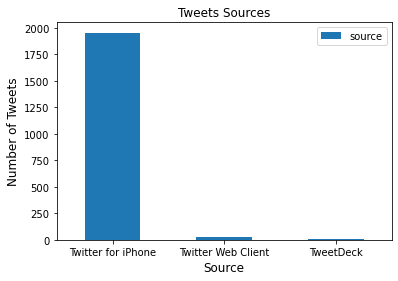

In [153]:
%matplotlib inline

ax = df['source'].value_counts().plot(kind='bar', title ="Tweets Sources", figsize=(6, 4), legend=True, fontsize=10, rot=0)
ax.set_xlabel("Source", fontsize=12)
ax.set_ylabel("Number of Tweets", fontsize=12)
plt.show()

#tweets_sources.plot.bar(rot=0)

### 5.1.2 Analysing Tweets Sources with retweet_count and favorite_count:

In [112]:
sub_df0 = df.groupby(['source'])[['retweet_count','favorite_count']].mean()[1:]
sub_df0

,retweet_count,favorite_count
source,,
Twitter Web Client,2612.821429,6083.642857
Twitter for iPhone,2769.901279,8953.455754


## 5.2 Analyzing Dog Stages:

### 5.2.1 Analyzing Dog Stages

In [113]:
dog_stage= df['dog_stage'].value_counts()

In [114]:
dog_stage[1:]

pupper           203
doggo             63
puppo             22
doggo-pupper       9
floofer            7
doggo-floofer      1
doggo-puppo        1
Name: dog_stage, dtype: int64

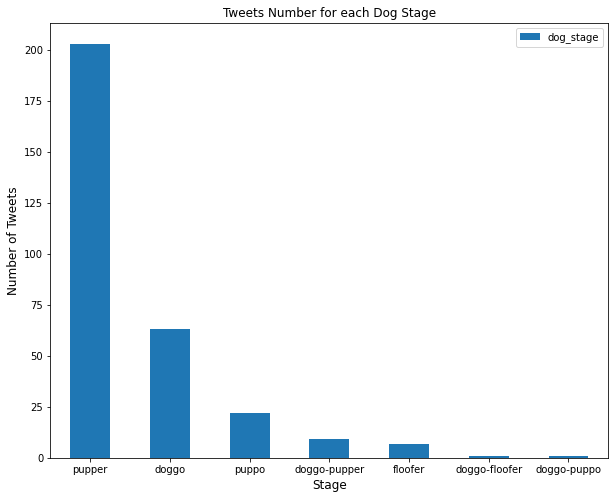

In [157]:
ax = df['dog_stage'].value_counts()[1:].plot(kind='bar', title ="Tweets Number for each Dog Stage", figsize=(10, 8), legend=True, fontsize=10, rot=0)
ax.set_xlabel("Stage", fontsize=12)
ax.set_ylabel("Number of Tweets", fontsize=12)
plt.show()

### 5.2.2 Analyzing Dog Stages vs retweet_count and favorite_count

In [116]:
sub_df = df.groupby(['dog_stage'])[['retweet_count','favorite_count']].mean()[1:]
sub_df                                                                              

,retweet_count,favorite_count
dog_stage,,
doggo,7125.698413,19356.380952
doggo-floofer,3433.000000,17169.000000
doggo-pupper,4083.444444,12533.111111
doggo-puppo,19196.000000,47844.000000
floofer,4968.714286,13206.000000
pupper,2363.581281,7197.738916
puppo,6473.954545,21582.090909


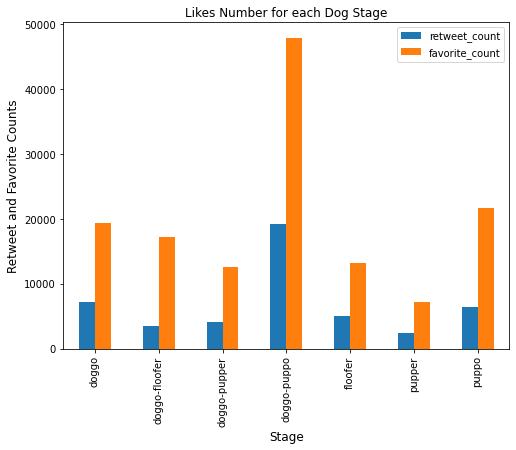

In [158]:
ax = sub_df[['retweet_count', 'favorite_count']].plot(kind='bar', title ="Likes Number for each Dog Stage", figsize=(8, 6), legend=True, fontsize=10)
ax.set_xlabel("Stage", fontsize=12)
ax.set_ylabel("Retweet and Favorite Counts", fontsize=12)
plt.show()

## 5.3 Analyzing retweet_count and favorite_count

### 5.3.1  Analyzing retweet_count and favorite_count by mean

In [118]:
print('Mean Retweet Count', format(round(df.retweet_count.mean())))

Mean Retweet Count 2767


### 5.3.2 Analyzing retweet_count  by month and year

In [119]:
retweet_count_by_year = df.groupby(df['date'].dt.year)["retweet_count"].count()
retweet_count_by_month = df.groupby(df['date'].dt.month)["retweet_count"].count()

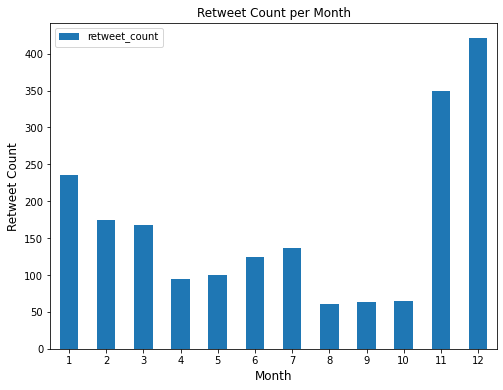

In [169]:
ax = retweet_count_by_month.plot(kind='bar', title ="Retweet Count per Month", figsize=(8, 6), legend=True, fontsize=10, rot=0)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Retweet Count", fontsize=12)
plt.show()


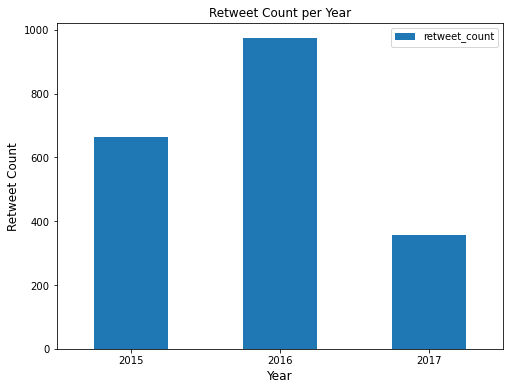

In [165]:
ax = retweet_count_by_year.plot(kind='bar', title ="Retweet Count per Year", figsize=(8, 6), legend=True, fontsize=10, rot=0)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Retweet Count", fontsize=12)
plt.show()

### 5.3.2  Analyzing favorite_count by month and year

In [122]:
favorite_count_by_year = df.groupby(df['date'].dt.year)["favorite_count"].count()
favorite_count_by_month = df.groupby(df['date'].dt.month)["favorite_count"].count()

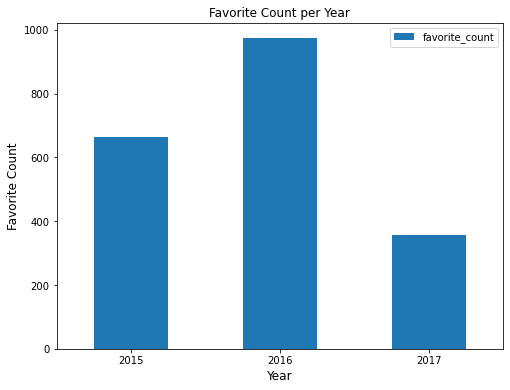

In [166]:
ax = favorite_count_by_year.plot(kind='bar', title ="Favorite Count per Year", figsize=(8, 6), legend=True, fontsize=10, rot=0)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Favorite Count", fontsize=12)
plt.show()

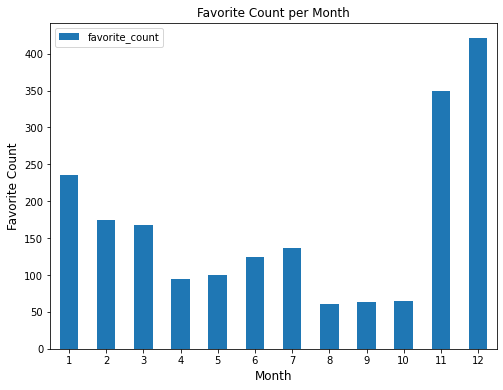

In [167]:
ax = favorite_count_by_month.plot(kind='bar', title ="Favorite Count per Month", figsize=(8, 6), legend=True, fontsize=10, rot=0)
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Favorite Count", fontsize=12)
plt.show()

### 5.3.3 Discription of retweet_count and favorite_count

In [125]:
df.loc[:,['retweet_count', 'favorite_count']].describe()

,retweet_count,favorite_count
count,1994.000000,1994.000000
mean,2766.753260,8895.725677
std,4674.698447,12213.193181
min,16.000000,81.000000
25%,624.750000,1982.000000
50%,1359.500000,4136.000000
75%,3220.000000,11308.000000
max,79515.000000,132810.000000


## 5.4 Analyzing Dog Name:

### 5.4.1 Relation between the dog name and retweet count:

In [126]:
print('%s\t%s' % ('Mean retweet count for dog with name', round(df.retweet_count[df.name != 'None'].mean())))
print('%s\t%s' % ('Mean retweet count for dog without name', round(df.retweet_count[df.name == 'None'].mean())))


#df.groupby(df['name'])["retweet_count"].max()

Mean retweet count for dog with name	2754
Mean retweet count for dog without name	2794


### 5.4.2 Relation between the dog name and favorite count:

In [127]:
print('%s\t%s' % ('Mean favorite count for dog with name', round(df.favorite_count[df.name != 'None'].mean())))
print('%s\t%s' % ('Mean favorite count for dog without name', round(df.favorite_count[df.name == 'None'].mean())))


Mean favorite count for dog with name	9414
Mean favorite count for dog without name	7811


### 5.4.3 Which dog name has the most retweet count

In [128]:
maximun = df['retweet_count'].max()
name = df[df['retweet_count'] == maximun]['name']

In [129]:
print('The highest retweet count was for the record number and name as follows: {} which recieved the retweet_count = {}'.format(name,maximun))

The highest retweet count was for the record number and name as follows: 775    None
Name: name, dtype: object which recieved the retweet_count = 79515


### 5.4.4 Which dog name has the least retweet count


In [130]:
minimun = df['retweet_count'].min()
min_name = df[df['retweet_count'] == minimun]['name']

In [131]:
print('The lowest retweet count was for the record number and name as follows: {} which recieved the retweet_count = {}'.format(min_name,minimun))

The lowest retweet count was for the record number and name as follows: 1977    None
Name: name, dtype: object which recieved the retweet_count = 16


### 5.4.5 Which dog name has the most favorite count


In [132]:
maximum_faorite = df['favorite_count'].max()
name_max_favo = df[df['favorite_count'] == maximum_faorite]['name']
print('The highest favourite count was for the record number and name as follows: {} which recieved the favorite_count = {}'.format(name_max_favo,maximum_faorite))

The highest favourite count was for the record number and name as follows: 309    None
Name: name, dtype: object which recieved the favorite_count = 132810


### 5.4.6 Which dog name has the least favorite count

In [133]:
minmum_faorite = df['favorite_count'].min()
name_mini_favo = df[df['favorite_count'] == minmum_faorite]['name']

In [134]:
print('The lowest favourite count was for the record number and name as follows:\n{} \n which recieved the favorite_count = {}'.format(name_mini_favo,minmum_faorite))

The lowest favourite count was for the record number and name as follows:
1977    None
Name: name, dtype: object 
 which recieved the favorite_count = 81


## 5.5 Analyzing Algorithms Performance:

In [135]:
image_df = image_predic_dfcopy.copy()

In [136]:
image_df.head(2)

,tweet_id,jpg_url,img_num,prediction_1,p1_confidence,p1_dog,prediction_2,p2_confidence,p2_dog,prediction_3,p3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [137]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tweet_id       2075 non-null   object 
 1   jpg_url        2075 non-null   object 
 2   img_num        2075 non-null   int64  
 3   prediction_1   2075 non-null   object 
 4   p1_confidence  2075 non-null   float64
 5   p1_dog         2075 non-null   bool   
 6   prediction_2   2075 non-null   object 
 7   p2_confidence  2075 non-null   float64
 8   p2_dog         2075 non-null   bool   
 9   prediction_3   2075 non-null   object 
 10  p3_confidence  2075 non-null   float64
 11  p3_dog         2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### 5.5.1 Getting the best Algorithm for prediction:
To do this, I will compare between the number of right rows in the columns p1_dog, p2_dog, p3_dog

In [138]:
Algo1_positivity = image_df[image_df['p1_dog'] == True]['p1_dog'].count()
Algo1_Negativity = image_df[image_df['p1_dog'] == False]['p1_dog'].count()

In [139]:
Algo2_positivity = image_df[image_df['p2_dog'] == True]['p2_dog'].count()
Algo2_Negativity = image_df[image_df['p2_dog'] == False]['p2_dog'].count()

In [140]:
Algo3_positivity = image_df[image_df['p3_dog'] == True]['p3_dog'].count()
Algo3_Negativity = image_df[image_df['p3_dog'] == False]['p3_dog'].count()

In [141]:
algo_comparions = []
algo_comparions = [ {'True': Algo1_positivity, 'False': Algo1_Negativity},
                   {'True': Algo2_positivity, 'False': Algo2_Negativity},
                   {'True': Algo3_positivity, 'False': Algo3_Negativity}]
algo_comparions

[{'True': 1532, 'False': 543},
 {'True': 1553, 'False': 522},
 {'True': 1499, 'False': 576}]

In [142]:
algo_comparions_df = pd.DataFrame(algo_comparions, index = ['Algo1','Algo2','Algo3'])
algo_comparions_df

,True,False
Algo1,1532,543
Algo2,1553,522
Algo3,1499,576


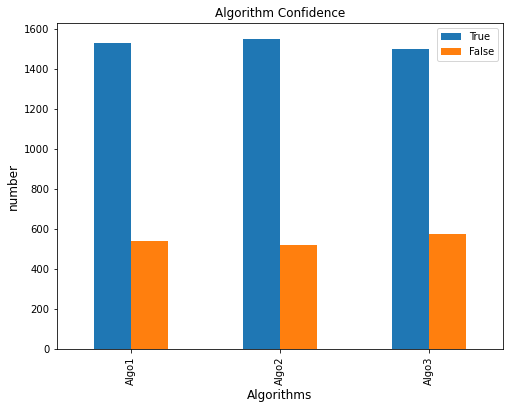

In [143]:
ax = algo_comparions_df[['True','False']].plot(kind='bar', title ="Algorithm Confidence", figsize=(8, 6), legend=True, fontsize=10)
ax.set_xlabel("Algorithms", fontsize=12)
ax.set_ylabel("number", fontsize=12)
plt.show()

Algorithm 2 is better than Algorithm1, and Algorithm 1 is better than Algorithm 3

In [144]:
Effeciency1 = Algo1_positivity/2075
Effeciency2 = Algo2_positivity/2075
Effeciency3 = Algo3_positivity/2075


In [145]:
Effeciency1

0.7383132530120482

In [146]:
Effeciency2

0.7484337349397591

In [147]:
Effeciency3

0.7224096385542169